In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import lightgbm as lgb


In [2]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')
sub=pd.read_csv('titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y_train=train['Survived']
features=train.drop(train[['Survived','PassengerId','Ticket', 'Cabin','Name']], axis=1)
x_test=test.drop(test[['PassengerId','Ticket', 'Cabin','Name']], axis=1)

In [5]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [6]:
features['Age'].isnull().sum()

177

In [7]:
features['Sex'].replace({'male':0,'female':1}, inplace=True)
features['Age'].fillna(features['Age'].median(),inplace=True)
features['Embarked'].replace({'C':0,'Q':1, 'S':2}, inplace=True)
x_test['Age'].fillna(features['Age'].median(),inplace=True)
x_test['Embarked'].replace({'C':0,'Q':1, 'S':2}, inplace=True)
x_test['Sex'].replace({'male':0,'female':1}, inplace=True)

In [8]:
features['Age'].isnull().sum()

0

In [9]:
categorical_features=['Sex','Age','Pclass','Embarked']
train['Survived'].groupby(train['Pclass']).value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_valid, y_train, y_valid=train_test_split(features,y_train, test_size=0.3)

In [12]:
lgb_train=lgb.Dataset(x_train, y_train, categorical_feature=categorical_features)
params={'objective':'binary'}
lgb_eval=lgb.Dataset(x_valid,y_valid, reference=lgb.train,categorical_feature=categorical_features)

In [13]:
model=lgb.train(params,lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10)

Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.447615	valid_1's binary_logloss: 0.464429
[20]	training's binary_logloss: 0.392519	valid_1's binary_logloss: 0.425863
[30]	training's binary_logloss: 0.353089	valid_1's binary_logloss: 0.424825
Early stopping, best iteration is:
[24]	training's binary_logloss: 0.376285	valid_1's binary_logloss: 0.422155


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [14]:
y_pred=model.predict(x_test,num_iteration=model.best_iteration)

(array([39., 39., 74., 21., 26., 14., 16., 11., 23., 19., 11.,  8., 11.,
         4., 20.,  2., 13.,  2., 16., 49.]),
 array([0.04673542, 0.09183411, 0.13693281, 0.1820315 , 0.22713019,
        0.27222888, 0.31732757, 0.36242626, 0.40752495, 0.45262364,
        0.49772233, 0.54282102, 0.58791972, 0.63301841, 0.6781171 ,
        0.72321579, 0.76831448, 0.81341317, 0.85851186, 0.90361055,
        0.94870924]),
 <a list of 20 Patch objects>)

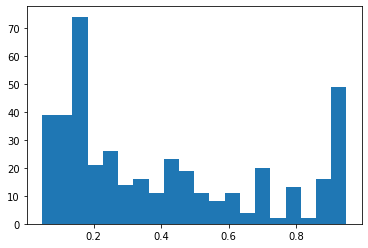

In [15]:
plt.hist(y_pred, bins=20)

In [16]:
y_pred = (y_pred > 0.545).astype(int)

In [17]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
sub['Survived']=list(map(int,y_pred))
sub['Survived'].value_counts()

0    293
1    125
Name: Survived, dtype: int64

In [19]:
sub.to_csv('titanicLBM6', index=False)

In [20]:
sub2=pd.read_csv('titanicLBM')
